# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Markus Hudobnik

**Section**: 002
***

This assignment is due on Moodle by **5pm on Friday September 29th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 99 fair coins and 1 double-headed coin.  You grab one coin at random.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You toss your coin one time.  What is the probability that you toss a Heads? 

200 possible outcomes, 101 are heads, 99 are tails. Since they both have an equal chance, 101/200 gives 50.5%

Another way is that they is there is 1/100 chance to grab the double-headed coin which has 2/2 chance of getting a heads. While there is a 99/100 chance to get a fair coin that has a 1/2 chance of getting a heads. 

So adding this up gives us $$\frac{1}{100} + (\frac{1}{100} * \frac{1}{2}) = \frac{1}{100} = .505 = 50.5\%$$

**Part B**: Suppose you toss a Heads.  What is the probability that the coin you chose from the box is double-sided? 

Using Bayes,
$$P(double|heads) = \frac{P(heads|double)P(double)}{P(heads|double)P(double) + P(heads|fair)P(fair)}$$

and plugging in the values,
$$P(double|heads) = \frac{1 * \frac{1}{100}}{1*\frac{1}{100} + \frac{1}{2} * \frac{99}{100}}$$

$$P(double|heads) = \frac{.01}{.505}$$ 


$$P(double|heads) = .0198$$


$$P(double|heads) = 1.98\%$$

**Part C**: Suppose you flip your coin $n$ times and record each outcome.  Obviously, if you flip Tails you know you picked a fair coin. But, if you flipped $n$ Heads in a row you would have a stronger belief that you in fact grabbed the double-headed coin.  What is the smallest value of $n$ Heads in a row that would make you believe that there's a better-than-half chance that the coin you grabbed is double-headed?  

I had trouble with this one.... I started by switching part B and A into variables to make it more general, so I could just plug in n and check the probability

$f$ = fair coins  
$d$ = double-headed  
$k$ = total coins  
$n$ = number of heads  

Part A $= \frac{f}{k}*\frac{1}{2^n} + \frac{d}{k}*1^n$  $ = \frac{f}{k2^n} + \frac{d*1^n}{k}$ $= \frac{f+d2^n}{k2^n}$

Part B $= \frac{\frac{d}{k}*1^n}{\frac{f+d2^n}{k2^n}}$ $=\frac{d2^n}{f+d2^n} $  

and since $d = 1$ and $f=99$,
$=\frac{2^n}{99+2^n} $

Using this formula, plugging in n=7 would give us 0.56387, which is roughly $56.40\%$ chance that the coin is a double-sided coin

### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

$ \Omega = \{(G,M),(M,G),(M,M)\} $ *Just my work space, not sure if this is right, but left it down jsut in case*

$ \Omega =  \begin{cases}G,MG,MMG,MMMG,...\\  MMMM... \end{cases} $

Where the top case is A getting a goal after some number of misses, while B contuially gets misses. Works the other way for B too. Im horrible at explaining, so hopefully that makes sense

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

$P(W \mid E)$ = Team A wins after first round = $ \frac{p(1-q)}{p(1-q)+q(1-p)}$

The are independent of each other, $P(E)$ and $P(W)$ are disjoint

**Part C**: Explain why events $W$ and $T$ are independent. 

$P(W \cup T) = P(W) + P(T)$ Proving that they are disjoint events

Meaning that $P(T \mid W) = P(T)$ also has to be true. And this is true because "the game is still tied after the first round of sudden death penalty shots if A wins the overall game" aka the game is still tied regardless of if A wins the game at a certain point

Meaning that $P(W \mid T) = P(W)$ also has to be true. And this is true because "A wins if the overall game is still tied after the first round of sudden death penalty shots" aka A wins the game regardless of the game tied or not at a certain point

The are independent because of the above and because A winning the overall game doesnt depend on if the game is tied after the first round. 

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

$ P(W) = P(W|E)P(E) + P(W|T)P(T) $   

We know $P(W|E)$ from Part B, and that $P(E)$ is equal to $(p(1-q) + q(1-p))$

therefore, 
$P(W|E)P(E) =  \frac{p(1-q)}{p(1-q)+q(1-p)} * (p(1-q) + q(1-p)) $

$P(T)$ is equal to "the game is still tied after the first round of sudden death penalty shots" meaning both teams have to NOT score, and one is dependent on the other. Plus the probability that they both score, which is dependent of the other event, so you add them. 

$P(T)  = (1-p)(1-q)+pq  =  1-q-p+2pq $

$P(W)= \frac{p(1-q)}{p(1-q)+q(1-p)} * (p(1-q) + q(1-p)) + 1-q-p+2pq * P(W|T)$

and finally, $P(W) = p(1-q) + (2pq-p-q+1)P(W|T) $

**Part E**: Use the fact from **Part C** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

Okay, not entirely sure if i did this math right but here it goes. 

First, I used that fact that $~P(W \mid T) = P(W)$, and changed the expression to $P(W) = p(1-q) + (2pq - p - q +1) P(W)$. 

Then, I distributed the $P(W)$ like so $P(W) = p(1-q) + 2P(W)pq - P(W)p - P(W)q +P(W)$

Then I divided by $P(W)$ to get  $1 = \frac{p(1-q)}{P(W)} + 2pq - p - q +1$

Then  $0 = \frac{p(1-q)}{P(W)} + 2pq - p - q$

Then  $ \frac{p(1-q)}{P(W)} = p + q - 2pq$

Then we can replace $ p + q - 2pq $ with $ p(1-q) + q(1-p)$ 

Which gives us $\frac{p(1-q)}{P(W)} = p(1-q) + q(1-p)$

Dividing out $p(1-q)$ gives us $\frac{1}{P(W)} = \frac{p(1-q) + q(1-p)}{p(1-q)}$

And finally flipping around everything gives us what we want which is:

$$P(W) = \frac{p(1-q)}{p(1-q) + q(1-p)}$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The answers in B and E are the same because in Part B, we are proving that Team A wins when the game ends after the first round. And in Part E we are proving (using independent events) that Team A winning is independent of if the game was ever tied. Therefore, both are independent events in respect to Team A winning. $P(W)$ is true if only A scores a goal and B doesnt. Which is in the case of $P(E)$ is only true if A or B wins and $P(T)$ is true if both of them dont win. $P(W)$ is only dependent on if A is the only team scoring a point. $P(E)$ and $P(T)$ are irrelevent to $P(W)$ in all cases. 

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

The significance is that we can use the advantage of disjoint events to change up the equations. $P(W)$ and $P(W|E)$ are the same because they are disjoint and all we did was break down each part using hte law of total probability. I think if we had a similiar problem, we would be able to to use the same technique, but it would be pointless and more work to get the same exact answer. 

### [25 points] Problem 3 
***

After Intro. Data Science lets out for the day, there are a bunch of different locations that Dan and Chris individually end up at.  Sometimes they go get dinner at the UMC ($~U~$) or coffee at Starbucks ($~S~$). Sometimes they go straight to their vehicles in the parking lot ($~P~$) and head home.  And sometimes they go back to their respective offices in the Engineering Center ($~E~$) or Fleming ($~F~$) to work. You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on the linked [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf).

Now, on a Wednesday after a particularly grueling start to the week, Dan and Chris leave class at Muenzinger in a bit of a daze and just sorta wander randomly between their usual haunts.  Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along (again, see the [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf)) with equal probability. 

**Part A**: Compute (by hand) the probability that Chris ends up at the Engineering Center after first visiting one other location after leaving Muenzinger. 

The paths are:
  
$ M -> P -> E $     
$ M -> U -> E $   

and applying probabililty functions to them

$P() = P(P|E)P(E)+P(U|E)P(E)$

$P() = \frac{1}{2}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4}$

$P() = \frac{3}{16}$

**Part B**: Compute (by hand) the probability that Dan ends up at the UMC _either_ as his first _or_ second location visited after leaving Muenzinger. 

$ M -> S -> M $     
$ M -> S -> U $  

$ M -> U -> F $     
$ M -> U -> S $  
$ M -> U -> M $     
$ M -> U -> E $  

$ M -> E -> F $     
$ M -> E -> P $  
$ M -> E -> M $     
$ M -> E -> U $  

$ M -> P -> M $     
$ M -> P -> E $ 

$P(U1) + P(U2) = [P(F|U)P(U)+P(S|U)P(U)+P(M|U)P(U)+P(E|U)P(U)]+[P(U|S)P(S)+P(E|S)P(E)]$  

$[\frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4}] + [\frac{1}{2}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4}]$

Which equals $\frac{7}{16}$

It would be $\frac{8}{16}$ but since S only has 2 options to choose from it slightly changes the end result in this scenario



**Part C**: Suppose that Chris goes back to his office in the Engineering Center and Dan goes back to his office in Fleming.  Later that night they both leave their offices and wander around. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on their second location visited? 

I calculated that Chris can make it to a 2nd location on 12 different paths. Dan can make it to a second location on 8 different paths. The probaility assuming that each path is unique is $\frac{1}{96}$. Calculating in the chance Chris and Dan make it to each of the locations on the 2nd stop and the multiplying each locations top by the others chance and then adding up this probabilities gives $\frac{15}{96}$ which is $\frac{5}{32}$ chance that they will be at the same location on both of their second stops

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

Part A:

In [1046]:
S = {'location' : np.array(["M","U"]), 'probs' : np.array([1/2,1/2])}
M = {'location' : np.array(["S","U","E","P"]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
U = {'location' : np.array(["F","S","M","E"]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
E = {'location' : np.array(["M","P","U","F"]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
P = {'location' : np.array(["M","E"]), 'probs' : np.array([1/2,1/2])}
F = {'location' : np.array(["E","U"]), 'probs' : np.array([1/2,1/2])}

locationS = {'location' : np.array([M,U]), 'probs' : np.array([1/2,1/2])}
locationM = {'location' : np.array([S,U,E,P]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
locationU = {'location' : np.array([F,S,M,E]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
locationE = {'location' : np.array([M,P,U,F]), 'probs' : np.array([1/4,1/4,1/4,1/4])}
locationP = {'location' : np.array([M,E]), 'probs' : np.array([1/2,1/2])}
locationF = {'location' : np.array([E,U]), 'probs' : np.array([1/2,1/2])}
location1M = np.random.choice(M["location"], p = M['probs'])

def pick_location_2(locationM):
    locationMM = np.random.choice(locationM["location"], p = locationM['probs'])
    return np.random.choice(locationMM["location"], p = locationMM['probs'])

def pick_location_1(M):
    return np.random.choice(M["location"], p = M['probs']) 

def prob_of(place,locationM,num_samples=1000):
    # get location
    locations = np.array([pick_location_2(locationM) for ii in range(num_samples)])
    return np.sum(locations == place) / num_samples

In [1023]:
prob_of("E", locationM, num_samples=5000)

0.18279999999999999

My code is finding how many a location shows up in the results. I used a for loop to run the function over and over to figure out the locations, then compared that to the user input location and just added up the values, which would represent the amount the location showed up in the samples. Then dividing that by the total samples gives how often it occurs, which is ~.18888 which is the same as my above fraction $\frac{3}{16}$

In [1116]:
def prob_of_B(place,locationM,M,num_samples=1000):
    locations = np.array([pick_location_2(locationM) for ii in range(num_samples)])
    location = np.array([pick_location_1(M) for ii in range(num_samples)])

    return (np.sum(locations == place)+np.sum(location == place)) / num_samples

In [1115]:
prob_of_B("U", locationM,M, num_samples=5000)

0.42580000000000001

My code is finding how many a location shows up in the results. I used a for loop to run the function over and over to figure out the 1st location and then another for the 2nd location. The we add those because they are independent of each other so we add the probabilities. Dividing this by the sample number gives us arounf ~43% which is exactly what I got above, $\frac{7}{16}$

### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100, or \$200, or pay the bank \$100 or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [1167]:
def miniopoly_turn(state, cash):
    die1 = np.random.randint(1, 7)
    die2 = np.random.randint(1, 7)
    dieSum = die1 + die2
    #print(die1)
    #print(die2)
    #print(dieSum)
    newLocation = dieSum + state
        #print(newLocation)
    if cash !=0:
        if state == 30:
            if die1 == die2:
                state = 10 + dieSum
            else:
                cash-=10
            return state, cash

        

        if newLocation >= 40:
            newLocation-=state
            cash+=200

        if newLocation==30:
            return state, cash

        if newLocation in (2,7,17,33,36):
            drawCard = np.array([50,100,200,-100,-150])
            cardCash = np.random.choice(drawCard)
            cash += cardCash
            if cash <= 0:
                cash = 0
            return newLocation, cash

        elif newLocation in (1,3,4,5,6,8,9,11,12,13,14,15,16,18,19,21,22,23,24,25,26,27,28,29,31,32,34,35,37,38,39):
            cash-=newLocation
            if cash <= 0:
                cash = 0
            return newLocation, cash

        return newLocation, cash 
    
    return newLocation, cash

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

In [1165]:
state = 0
cash = 200

def simulation(turns,num_samples=5000):
    game=[]
    counter=0
    for ii in range(num_samples):
        state = 0
        cash = 200
        for turn in range(turns):
            state, cash = miniopoly_turn(state, cash)
        game.append(cash)
    
    fig, ax = plt.subplots(figsize=(15,4))
    plt.hist(game, normed=False, bins=50)
    ax.set_title("Ending Cash values over a 30-turn game of Miniopoly")
    plt.ylabel('frequency ');
    plt.xlabel('Amunt of cash (in Miniopoly money)');
    #game = np.array([miniopoly_turn(state, cash) for ii in range(num_samples)])
    return 

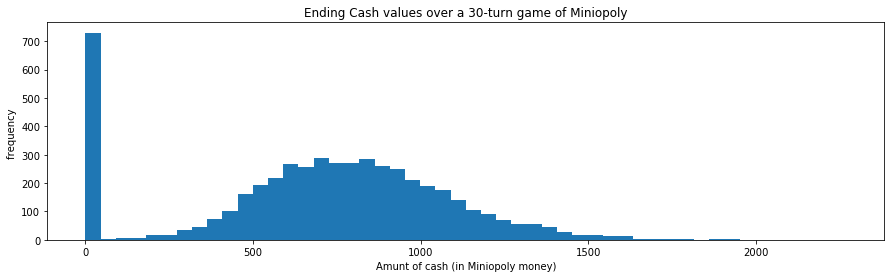

In [1166]:
simulation(30,5000)

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [1136]:
def prob_of_bankrupt(turns,num_samples=5000):
    counter = 0
    for ii in range(num_samples):
        state = 0
        cash = 200
        for turn in range(turns):
            state, cash = miniopoly_turn(state, cash)
        if cash <=0:
            counter+=1
    return counter/num_samples

In [1152]:
prob_of_bankrupt(30,5000)

0.1384

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [1225]:
def prob_of_bankrupt_jail(turns,num_samples=5000):
    counter = 0
    jail = 0
    for ii in range(num_samples):
        state = 0
        cash = 200
        for turn in range(turns):
            state, cash = miniopoly_turn(state, cash)
            if state == 30:
                jail+=1
        if (cash <=0):
            if (jail !=0):
                counter+=1
    return counter/num_samples

In [1247]:
prob_of_bankrupt_jail(30,5000)

0.1252

According to my data, it seems that going to jail gives you a slightly better chance to not go bankrupt. Very slight, as within 1%. 

**Part E**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they passed **Go** two or more times.  Is a player more or less likely to go bankrupt if they've managed to pass **Go** at least twice?

In [1226]:
def prob_of_bankrupt_go2(turns,num_samples=5000):
    counter = 0
    
    for ii in range(num_samples):
        state = 0
        cash = 200
        goCounter =0
        stateCounter = 0
        for turn in range(turns):
            state, cash = miniopoly_turn(state, cash)
            stateCounter+=state
            if stateCounter >=78:
                goCounter+=1
                
        if (cash <=0): 
            if (goCounter >=6):
                counter+=1
    return counter/num_samples

In [1224]:
prob_of_bankrupt_go2(30,5000)

0.1438

According to my data, it seems that passing GO doesnt change your chances betweent he previous two. 

### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan and Chris have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [4]:
dfLog = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
0,10,23,33,1,13,22,31,0,6,15,...,437,427,409,380,343,593,582,561,530,fake
1,4,8,15,21,29,38,3,9,18,25,...,595,584,684,657,622,819,805,705,673,fake
2,9,17,23,31,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,real
3,7,10,16,22,31,0,6,13,16,23,...,285,275,265,265,239,202,398,385,362,real
4,11,23,33,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [5]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
995,5,13,20,22,32,38,7,15,28,0,...,443,420,393,358,558,408,392,364,326,NaN
996,8,14,18,24,32,39,6,10,14,21,...,158,119,310,292,269,240,290,484,470,NaN
997,7,14,19,23,33,1,8,15,26,38,...,497,484,465,436,486,686,586,571,545,NaN
998,5,13,22,29,38,7,16,27,37,8,...,547,520,620,817,801,778,978,1177,1164,NaN
999,8,13,23,30,30,30,22,28,34,38,...,536,513,482,682,674,660,639,613,579,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [6]:
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
    
    dfPredict.loc[:, "Prediction"] = "real"
    
    return dfPredict 

In [7]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))

**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)